<a href="https://colab.research.google.com/github/ramank123/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Title** : **Yes Bank Stock Closing Prediction**

**Yes Bank Stock Closing Prediction Dataset Contains Columns namely**

**1) Date** - 

**2) Open**- **Opening Price of Stock on Particular Day**

**3) High**- **Highest Price of Stock on Particular Day**

**4) Low**- **Lowest Price of Stock on Particular Day**

**5) Close** -**Closing Price of Stock on Particular Day**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.model_selection import train_test_split

## **Load Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices (1).csv')

In [4]:
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [5]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [7]:
df.shape

(185, 5)

In [8]:
df.info

<bound method DataFrame.info of        Date   Open   High    Low  Close
0    Jul-05  13.00  14.00  11.25  12.46
1    Aug-05  12.58  14.88  12.55  13.42
2    Sep-05  13.48  14.87  12.27  13.30
3    Oct-05  13.20  14.47  12.40  12.99
4    Nov-05  13.35  13.88  12.88  13.41
..      ...    ...    ...    ...    ...
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

[185 rows x 5 columns]>

In [9]:
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [10]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [11]:
len(df[df.duplicated()])

0

In [12]:
#importing datetime
from datetime import datetime 
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,"%b-%y"))

In [13]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [14]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

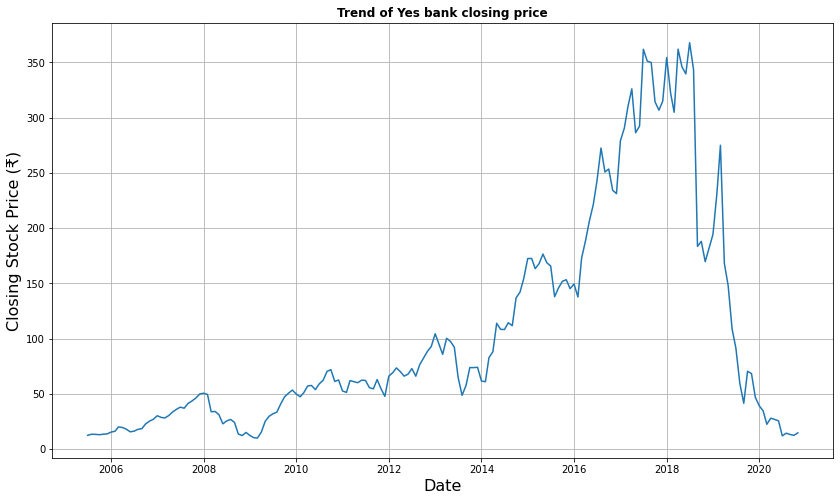

In [15]:
# trend of dependent variable 
plt.figure(figsize = (14,8))
plt.grid(True)
plt.title('Trend of Yes bank closing price',fontweight = 'bold')
plt.plot(df['Date'],df['Close'])
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Closing Stock Price (₹)',fontsize = 16)
plt.show()

Text(0, 0.5, 'Density')

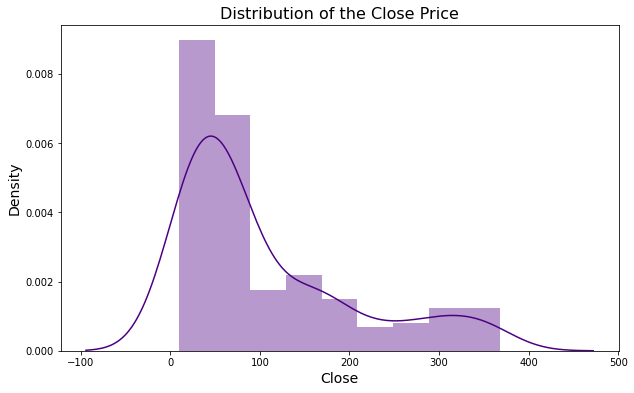

In [16]:
#Checking the distribution of our dependent variable 
plt.figure(figsize = (10,6))
sns.distplot(df['Close'],color = 'indigo')
plt.title('Distribution of the Close Price',fontsize = 16)
plt.xlabel('Close',fontsize = 14)
plt.ylabel('Density',fontsize = 14)

Text(0.5, 1.0, 'Distribution of the Close Price after log transformation')

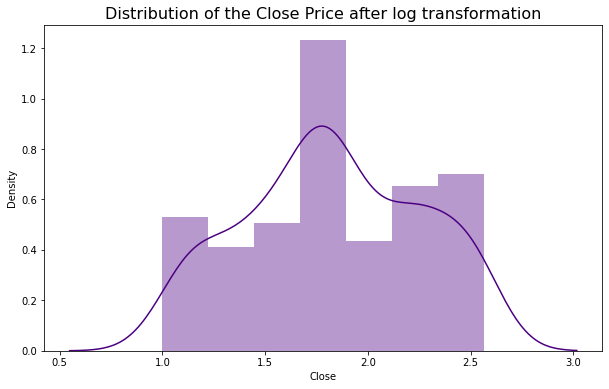

In [17]:
#Distribution after applying Log Transformation
plt.figure(figsize = (10,6))
sns.distplot(np.log10(df['Close']),color = 'indigo')
plt.title('Distribution of the Close Price after log transformation',fontsize = 16)

In [18]:
df.corr()

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


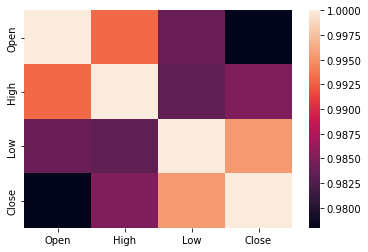

In [19]:
sns.heatmap(df.corr())

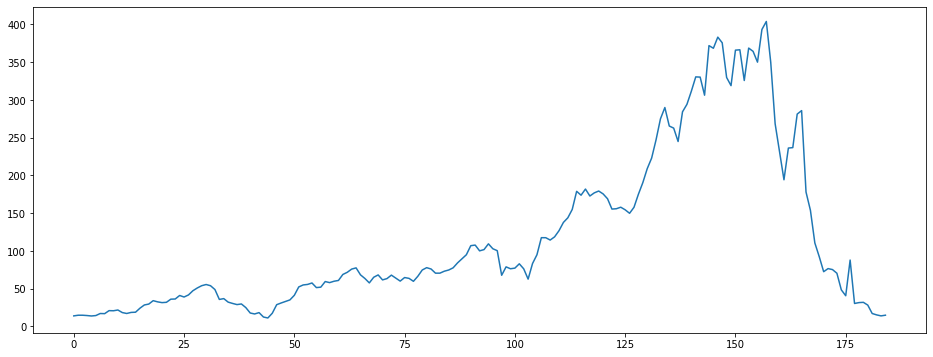

In [20]:
df['High'].plot(figsize=(16,6))

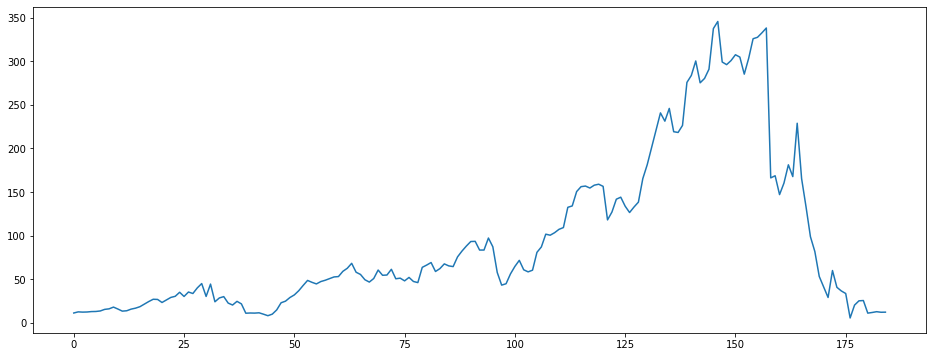

In [21]:
df['Low'].plot(figsize=(16,6))

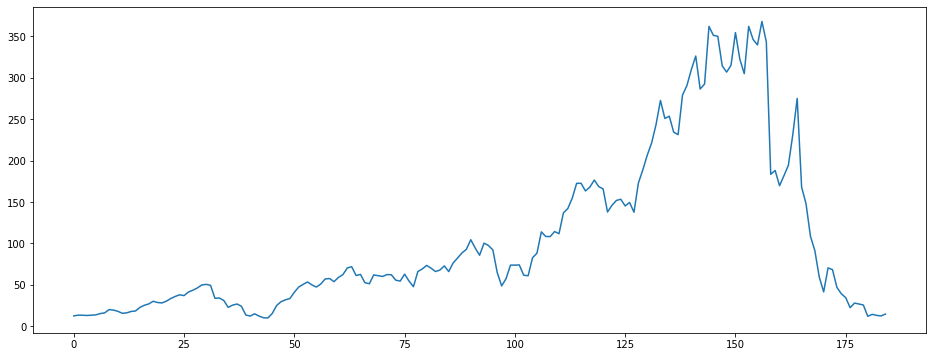

In [22]:
df['Close'].plot(figsize=(16,6))

# **Split Data**

In [23]:
X=df[['Open', 'High', 'Low']]
y=df['Close']

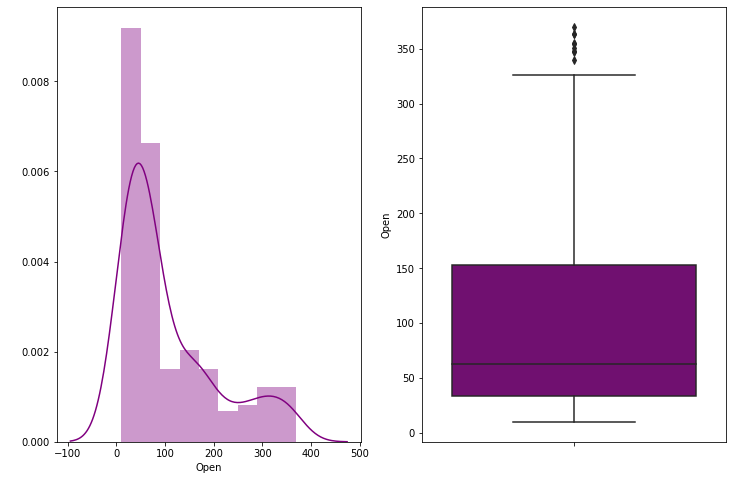

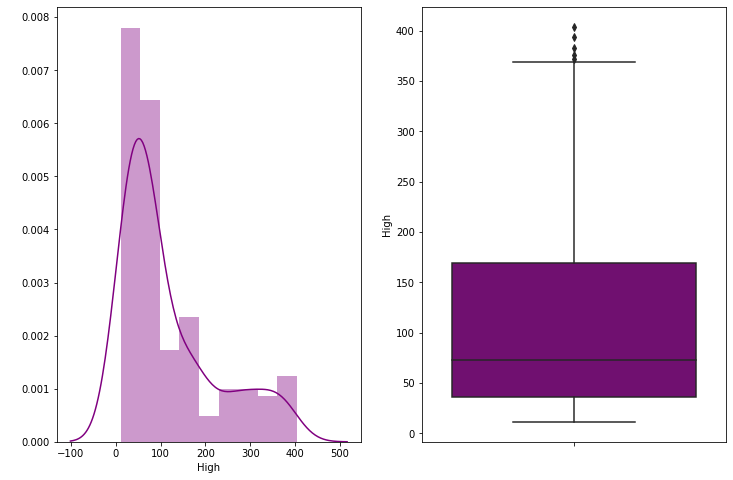

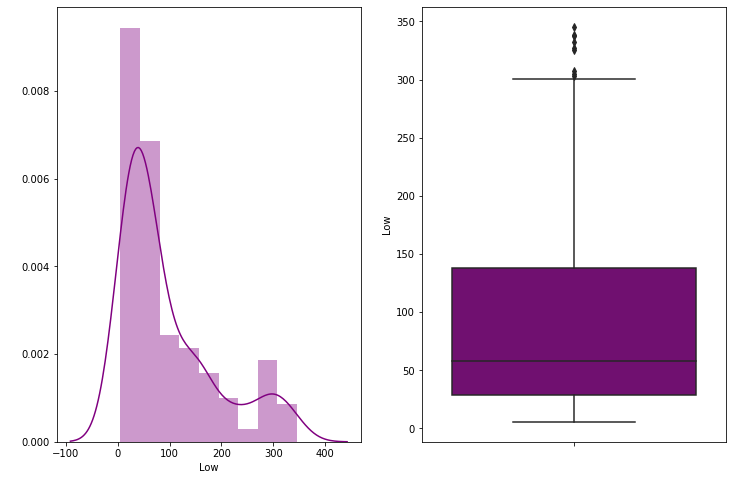

In [24]:
#plot for independent variable
for var in X:
    plt.figure(figsize=(12,8))

    plt.subplot(1, 2, 1)
    fig = sns.distplot(x=df[var],color='purple')
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=df[var],color='purple')
    fig.set_xlabel('')
    fig.set_ylabel(var)

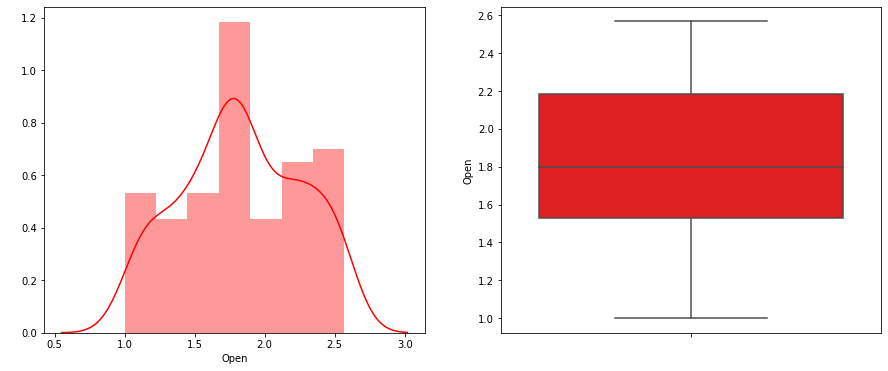

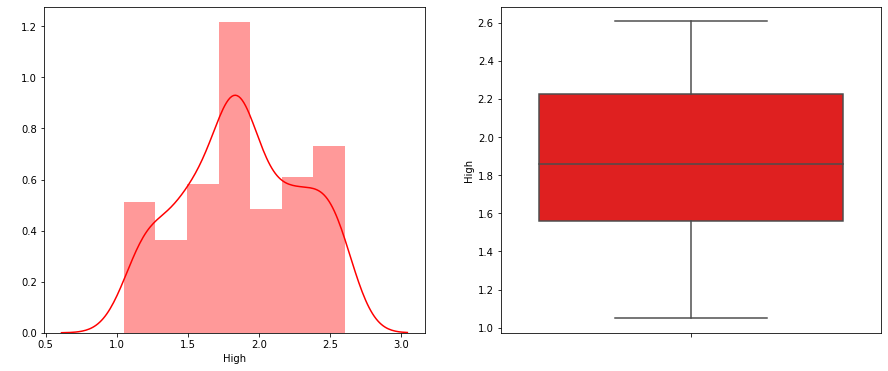

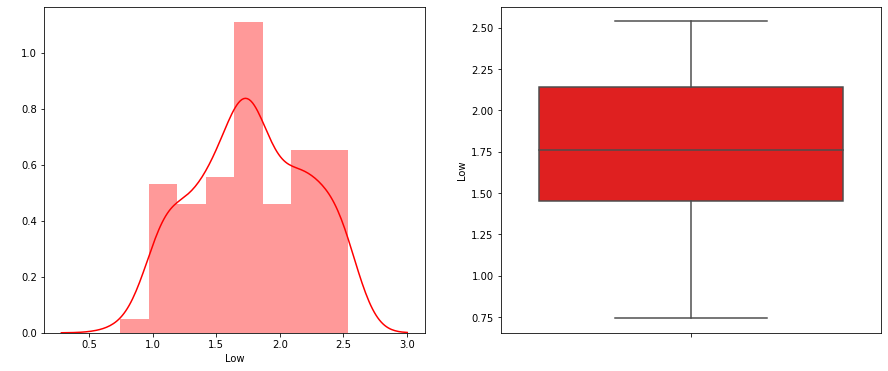

In [25]:
#plot for independent variables
for var in X:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df[var]),color='red')
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(df[var]),color='red')
    fig.set_title('')
    fig.set_ylabel(var)

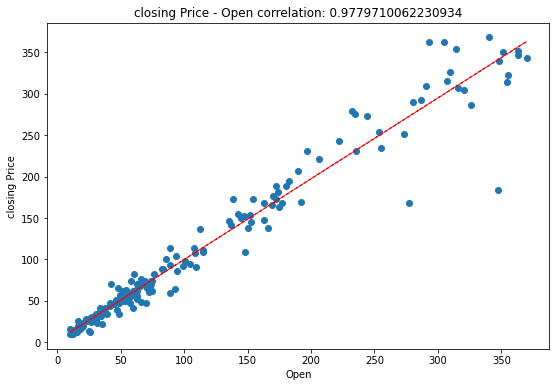

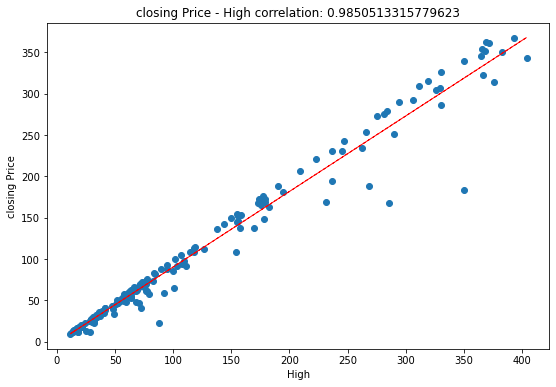

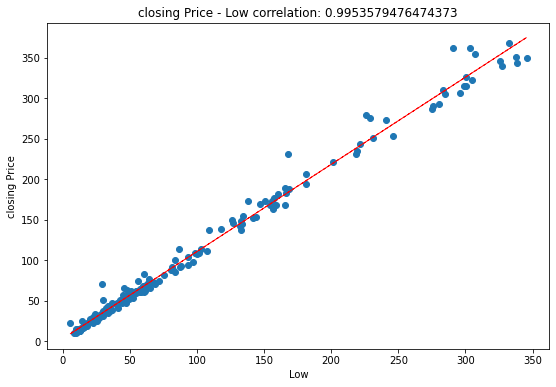

In [26]:
#checking the correlation with dependent varible
for col in X:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df[col]
   label = df['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('closing Price')
   ax.set_title('closing Price - ' + col + ' correlation: ' + str(correlation))
   z = np.polyfit(df[col], df['Close'], 1)
   y_hat = np.poly1d(z)(df[col])
 
   plt.plot(df[col], y_hat, "r--", lw=1)
 
plt.show()

In [27]:
#adding average column
df['Average'] = (df['Low'] + df['High'])/2
#adding month column
df['Month'] = df['Date'].apply(lambda y: y.strftime('%B'))
#introducing new features of name year
df['Year'] = df['Date'].apply(lambda z: z.strftime('%Y'))

In [28]:
#Making date column as index
df.index = df['Date']
df.drop('Date',axis = 1,inplace = True)

In [29]:
df.head(3)

,Open,High,Low,Close,Average,Month,Year
Date,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.625,July,2005
2005-08-01,12.58,14.88,12.55,13.42,13.715,August,2005
2005-09-01,13.48,14.87,12.27,13.30,13.570,September,2005


In [30]:
# Create a column 'Prediction' and shift 'n' Months for future prediction
future_months = 1
df['Prediction'] = df[['Close']].shift(-future_months)               # Shift() Function shifts index by the desired number of periods
df.head(3)

,Open,High,Low,Close,Average,Month,Year,Prediction
Date,,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.625,July,2005,13.42
2005-08-01,12.58,14.88,12.55,13.42,13.715,August,2005,13.30
2005-09-01,13.48,14.87,12.27,13.30,13.570,September,2005,12.99


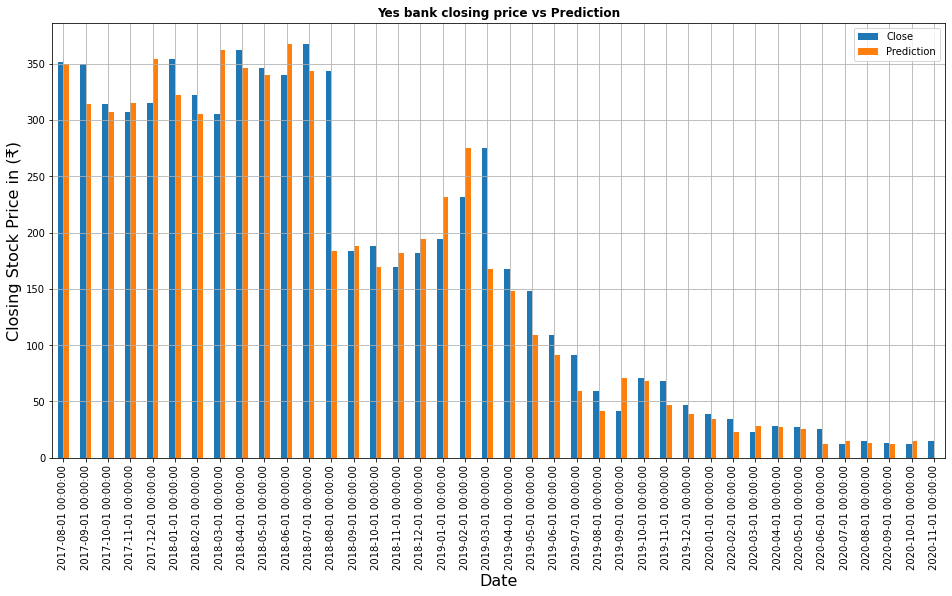

In [31]:
#Closing price vs prediction
df[['Close','Prediction']].tail(40).plot(kind='bar',figsize=(16,8))                  
plt.grid(True)                                                        
plt.title('Yes bank closing price vs Prediction',fontweight = 'bold')
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Closing Stock Price in (₹)',fontsize = 16)
plt.show()

In [32]:
# drop prediction field
df.drop('Prediction',axis = 1,inplace = True)

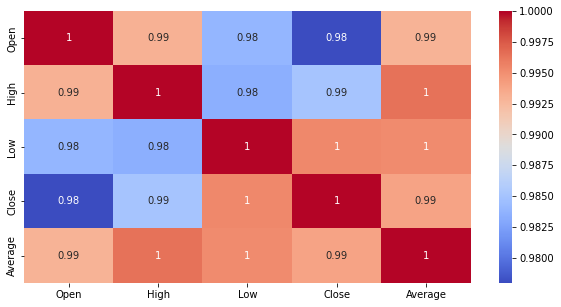

In [33]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.show()

In [34]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(data):
  vif = pd.DataFrame()
  vif['Variables'] = data.columns
  vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return (vif)

In [35]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close']]])

,Variables,VIF
0,Open,175.185704
1,High,inf
2,Low,inf
3,Average,inf


In [36]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close','Average']]])

,Variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


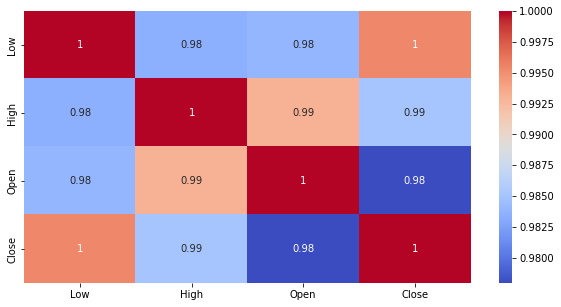

In [37]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(df[['Low','High','Open','Close']].corr(), annot = True, cmap='coolwarm')
plt.show()

In [38]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close','Average','Open']]])

,Variables,VIF
0,High,62.598129
1,Low,62.598129


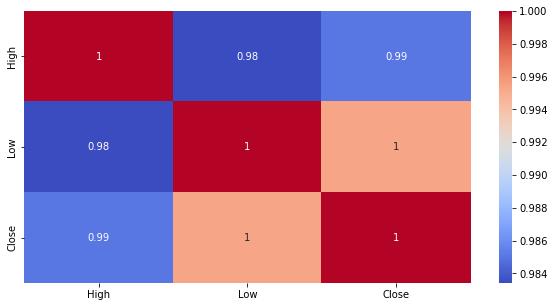

In [39]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(df[['High','Low','Close']].corr(), annot = True, cmap='coolwarm')
plt.show()

In [40]:
#introducing dummy variables
df = pd.get_dummies(df,columns = ['Year'])

In [41]:
df.head(3)

,Open,High,Low,Close,Average,Month,Year_2005,Year_2006,Year_2007,Year_2008,...,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020
Date,,,,,,,,,,,,,,,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.625,July,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2005-08-01,12.58,14.88,12.55,13.42,13.715,August,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2005-09-01,13.48,14.87,12.27,13.30,13.570,September,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df.shape

(185, 22)

In [63]:
#independent Variables
total_features  = ['Low','Year_2005','Year_2006','Year_2007','Year_2008','Year_2009','Year_2010',
                   'Year_2011','Year_2012','Year_2013','Year_2014','Year_2015','Year_2016','Year_2017',
                   'Year_2018','Year_2019','Year_2020']
print("Total independent variables: ",len(total_features))

Total independent variables:  17


In [64]:
#Installing scipy 
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
#applying zscore to each values of independent variable 
from scipy.stats import zscore
X = round(df[total_features].apply(zscore),3)

In [72]:
X

,Low,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020
Date,,,,,,,,,,,,,,,,,
2005-07-01,-0.920,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-08-01,-0.906,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-09-01,-0.909,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-10-01,-0.907,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-11-01,-0.902,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,-0.922,-0.183,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,3.977
2020-08-01,-0.913,-0.183,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,3.977
2020-09-01,-0.904,-0.183,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,3.977


In [75]:
#applying log on dependent variable 
y = np.log10(df['Close'])

In [76]:
y

Date
2005-07-01    1.095518
2005-08-01    1.127753
2005-09-01    1.123852
2005-10-01    1.113609
2005-11-01    1.127429
                ...   
2020-07-01    1.077368
2020-08-01    1.157457
2020-09-01    1.118926
2020-10-01    1.094122
2020-11-01    1.166430
Name: Close, Length: 185, dtype: float64

In [77]:
#Importing libraries
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [78]:
#Split our data into train and test datasets 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (148, 17)
X_test:  (37, 17)
y_train:  (148,)
y_test:  (37,)


In [79]:
#Creating DataFrames of test and train dataset
train_df = pd.DataFrame(X_train,y_train)
test_df = pd.DataFrame(10**y_test)
test_df.rename(columns = {'Close':'Actual Closing Price'},inplace = True)

In [82]:
X_train

,Low,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020
Date,,,,,,,,,,,,,,,,,
2014-12-01,0.429,-0.183,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,3.797,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2006-03-01,-0.868,-0.183,3.797,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2013-07-01,-0.409,-0.183,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,3.797,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2019-09-01,-0.594,-0.183,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,3.797,-0.251
2009-04-01,-0.934,-0.183,-0.263,-0.263,-0.263,3.797,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-01,-0.402,-0.183,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,3.797,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2011-02-01,-0.530,-0.183,-0.263,-0.263,-0.263,-0.263,-0.263,3.797,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2015-04-01,0.655,-0.183,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,3.797,-0.263,-0.263,-0.263,-0.263,-0.251


In [83]:
y_train

Date
2014-12-01    2.189125
2006-03-01    1.302764
2013-07-01    1.811307
2019-09-01    1.617525
2009-04-01    1.188928
                ...   
2014-02-01    1.784974
2011-02-01    1.710033
2015-04-01    2.225206
2009-06-01    1.472464
2019-11-01    1.834421
Name: Close, Length: 148, dtype: float64

In [84]:
X_test

,Low,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020
Date,,,,,,,,,,,,,,,,,
2008-04-01,-0.730,-0.183,-0.263,-0.263,3.797,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2015-12-01,0.426,-0.183,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,3.797,-0.263,-0.263,-0.263,-0.263,-0.251
2019-12-01,-0.596,-0.183,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,3.797,-0.251
2014-11-01,0.412,-0.183,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,3.797,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2010-08-01,-0.395,-0.183,-0.263,-0.263,-0.263,-0.263,3.797,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2007-01-01,-0.747,-0.183,-0.263,3.797,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2016-12-01,1.355,-0.183,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,3.797,-0.263,-0.263,-0.263,-0.251
2006-02-01,-0.874,-0.183,3.797,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-12-01,-0.901,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251


In [85]:
y_test

Date
2008-04-01    1.532245
2015-12-01    2.162056
2019-12-01    1.671636
2014-11-01    2.152533
2010-08-01    1.793930
2007-01-01    1.479431
2016-12-01    2.364101
2006-02-01    1.207365
2005-12-01    1.137037
2019-01-01    2.288473
2018-03-01    2.484157
2019-07-01    1.960471
2015-11-01    2.185542
2011-06-01    1.795045
2018-06-01    2.530968
2019-03-01    2.439412
2010-10-01    1.856487
2008-08-01    1.428621
2017-01-01    2.445760
2010-01-01    1.697578
2009-03-01    0.999131
2014-09-01    2.048053
2019-05-01    2.170115
2010-07-01    1.770778
2016-06-01    2.344981
2019-10-01    1.847881
2016-09-01    2.399414
2005-11-01    1.127429
2014-07-01    2.034267
2011-01-01    1.720903
2018-08-01    2.535800
2017-07-01    2.558661
2012-09-01    1.883321
2015-03-01    2.213013
2007-09-01    1.616581
2010-02-01    1.675045
2016-10-01    2.404012
Name: Close, dtype: float64

In [86]:
#Applying Linear Regression 
lr = LinearRegression()
lin_reg = lr.fit(X_train,y_train)

In [87]:
#Checking efficiency of training model
lin_reg.score(X_train,y_train)

0.9403650204419233

In [88]:
#getting regression coefficients 
print('Intercept:',lin_reg.intercept_)
print('Regressors: \n',lin_reg.coef_)

Intercept: -58875444889.93402
Regressors: 
 [3.05309444e-01 7.90575959e+12 1.09921214e+13 1.09921214e+13
 1.09921214e+13 1.09921214e+13 1.09921214e+13 1.09921214e+13
 1.09921214e+13 1.09921214e+13 1.09921214e+13 1.09921214e+13
 1.09921214e+13 1.09921214e+13 1.09921214e+13 1.09921214e+13
 1.05553484e+13]


In [90]:
#Predict y_test on the basis of train sets
y_pred = lin_reg.predict(X_test)
print("Printed values of Y: \n",y_pred)

Printed values of Y: 
 [1.41558838 2.13433838 1.83746338 2.10699463 1.79840088 1.53277588
 2.40777588 1.24371338 1.09527588 2.31011963 2.53668213 1.97808838
 2.16949463 1.71246338 2.67730713 2.47027588 1.82965088 1.40386963
 2.25152588 1.75933838 1.33746338 2.02105713 2.14996338 1.77886963
 2.34918213 1.79840088 2.45074463 1.09527588 2.00152588 1.69293213
 2.71636963 2.46636963 1.87652588 2.21246338 1.55621338 1.75152588
 2.49371338]


In [91]:
test_df['LR Predicted Closing Price'] = 10**y_pred
test_df.head(3)

,Actual Closing Price,LR Predicted Closing Price
Date,,
2008-04-01,34.06,26.036846
2015-12-01,145.23,136.250586
2019-12-01,46.95,68.780191


In [92]:
def evaluation_metrics(data):
  MSE = mean_squared_error(y_test,data)
  print("Mean Squared Error: ",MSE)
  RMSE = np.sqrt(MSE)
  print("Root Mean Squared Error: ",RMSE)
  r2 = r2_score(y_test,data)
  print("R2: ",r2)
  adjusted_r2 = 1-(1-r2_score(y_test,data))*(X_test.shape[0]-1)/((X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2: ",adjusted_r2)
  return

In [93]:
evaluation_metrics(y_pred)

Mean Squared Error:  0.008378716531125619
Root Mean Squared Error:  0.09153532941507131
R2:  0.9550214108859424
Adjusted R2:  0.9147774100996803


In [94]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_percentage_error
MAE  = mean_absolute_percentage_error

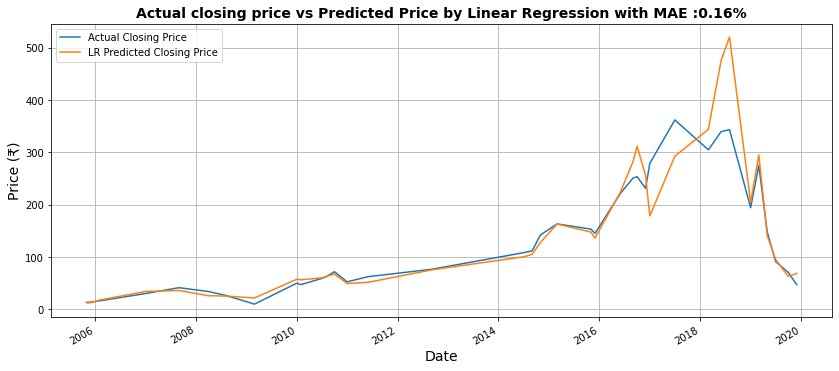

In [95]:
#Graph between Actual Close price and Predicted Price
test_df.plot(figsize = (14,6))
plt.grid(True)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs Predicted Price by Linear Regression with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

# **RIDGE REGRESSION**